In [2]:
#importing all the packages that I might need
import pandas as pd
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 300)
from scipy.stats import norm

In [3]:
data_grad = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='All',header=8)
data_ell = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='ELL',header=8)
data_swd = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='SWD',header=8)
data_ethnicity = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='Ethnicity',header=8)
data_gender = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='Gender',header=8)
data_poverty = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='Poverty',header=8)

In [4]:
df_created = [data_ell,data_swd,data_ethnicity,data_gender,data_poverty]

In [5]:
data_grad.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,All Students,2014,4 year August,29,28,0.965517,25,86.2069,89.2857,0,0,0,25,86.2069,89.2857,3,10.3448,10.7143,0,0,1,3.44828
1,01M292,Orchard Collegiate Academy,All Students,2013,4 year August,36,25,0.694444,23,63.8889,92,0,0,0,23,63.8889,92,2,5.55556,8,3,8.33333,7,19.4444
2,01M292,Orchard Collegiate Academy,All Students,2012,4 year August,44,24,0.545455,20,45.4545,83.3333,1,2.27273,4.16667,19,43.1818,79.1667,4,9.09091,16.6667,10,22.7273,10,22.7273
3,01M292,Orchard Collegiate Academy,All Students,2011,4 year August,73,46,0.630137,41,56.1644,89.1304,0,0,0,41,56.1644,89.1304,5,6.84932,10.8696,18,24.6575,7,9.58904
4,01M292,Orchard Collegiate Academy,All Students,2010,4 year August,61,26,0.426230,26,42.623,100,1,1.63934,3.84615,25,40.9836,96.1538,0,0,0,18,29.5082,17,27.8689


In [6]:
data_grad.columns

Index(['DBN', 'School Name', 'Category', 'Cohort Year', 'Cohort', '#', '#.1',
       '% of cohort', '#.2', '% of cohort.1', '% of grads', '#.3',
       '% of cohort.2', '% of grads.1', '#.4', '% of cohort.3', '% of grads.2',
       '#.5', '% of cohort.4', '% of grads.3', '#.6', '% of cohort.5', '#.7',
       '% of cohort.6'],
      dtype='object')

In [7]:
data_ell.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,ELL,2014,4 year August,1,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
1,01M292,Orchard Collegiate Academy,ELL,2013,4 year August,2,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
2,01M292,Orchard Collegiate Academy,ELL,2012,4 year August,6,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
3,01M292,Orchard Collegiate Academy,ELL,2011,4 year August,14,3,21.4286,1,7.14286,33.3333,0,0,0,1,7.14286,33.3333,2,14.2857,66.6667,8,57.1429,2,14.2857
4,01M292,Orchard Collegiate Academy,ELL,2010,4 year August,14,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s


In [8]:
data_swd.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,Not SWD,2014,4 year August,21,21,100,21,100,100,0,0,0,21,100,100,0,0,0,0,0,0,0
1,01M292,Orchard Collegiate Academy,Not SWD,2013,4 year August,24,19,79.1667,19,79.1667,100,0,0,0,19,79.1667,100,0,0,0,1,4.16667,4,16.6667
2,01M292,Orchard Collegiate Academy,Not SWD,2012,4 year August,31,19,61.2903,18,58.0645,94.7368,1,3.22581,5.26316,17,54.8387,89.4737,1,3.22581,5.26316,5,16.129,7,22.5806
3,01M292,Orchard Collegiate Academy,Not SWD,2011,4 year August,53,39,73.5849,38,71.6981,97.4359,0,0,0,38,71.6981,97.4359,1,1.88679,2.5641,10,18.8679,3,5.66038
4,01M292,Orchard Collegiate Academy,Not SWD,2010,4 year August,47,25,53.1915,25,53.1915,100,1,2.12766,4,24,51.0638,96,0,0,0,10,21.2766,12,25.5319


In [9]:
data_ethnicity.tail()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
98095,32K564,Bushwick Community High School,White,2006,6 year June,5,2,40,0,0,0,0,0,0,0,0,0,2,40,100,0,0,2,40
98096,32K564,Bushwick Community High School,White,2005,6 year June,2,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
98097,32K564,Bushwick Community High School,White,2003,6 year June,1,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
98098,32K564,Bushwick Community High School,White,2002,6 year June,2,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
98099,32K564,Bushwick Community High School,White,2001,6 year June,2,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s


In [6]:
data_grad_2014 = data_grad[data_grad['Cohort Year'] == 2014]
data_grad_2014 = data_grad_2014[data_grad_2014['Cohort'] == '4 year August']

In [7]:
data_grad_2014.sample(10)

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
1094,02M374,Gramercy Arts High School,All Students,2014,4 year August,113,91,0.805310,84,74.3363,92.3077,2,1.76991,2.1978,82,72.5664,90.1099,7,6.19469,7.69231,19,16.8142,1,0.884956
21554,28Q350,Jamaica Gateway to the Sciences,All Students,2014,4 year August,132,111,0.840909,104,78.7879,93.6937,56,42.4242,50.4505,48,36.3636,43.2432,7,5.30303,6.30631,11,8.33333,9,6.81818
22191,29Q272,George Washington Carver High School for the S...,All Students,2014,4 year August,143,107,0.748252,106,74.1259,99.0654,11,7.69231,10.2804,95,66.4336,88.785,1,0.699301,0.934579,26,18.1818,8,5.59441
10285,10X445,The Bronx High School of Science,All Students,2014,4 year August,719,716,0.995828,716,99.5828,100,694,96.5229,96.9274,22,3.05981,3.07263,0,0,0,1,0.139082,2,0.278164
17291,19K507,Performing Arts and Technology High School,All Students,2014,4 year August,92,74,0.804348,48,52.1739,64.8649,0,0,0,48,52.1739,64.8649,26,28.2609,35.1351,11,11.9565,5,5.43478
11382,11X514,The Bronxwood Preparatory Academy,All Students,2014,4 year August,100,65,0.650000,56,56,86.1538,4,4,6.15385,52,52,80,9,9,13.8462,16,16,16,16
23393,31R460,Susan E. Wagner High School,All Students,2014,4 year August,761,662,0.869908,599,78.7122,90.4834,219,28.7779,33.0816,380,49.9343,57.4018,63,8.27858,9.51662,66,8.6728,24,3.15375
18437,21K620,William E. Grady Career and Technical Educatio...,All Students,2014,4 year August,144,99,0.687500,80,55.5556,80.8081,4,2.77778,4.0404,76,52.7778,76.7677,19,13.1944,19.1919,22,15.2778,16,11.1111
4127,03M402,The Urban Assembly School for Green Careers,All Students,2014,4 year August,85,67,0.788235,41,48.2353,61.194,0,0,0,41,48.2353,61.194,26,30.5882,38.806,13,15.2941,4,4.70588
1478,02M411,Baruch College Campus High School,All Students,2014,4 year August,117,116,0.991453,112,95.7265,96.5517,76,64.9573,65.5172,36,30.7692,31.0345,4,3.4188,3.44828,1,0.854701,0,0


In [13]:
len(data_grad_2014)

479

In [8]:
data_grad_2014 = data_grad_2014[['DBN','School Name','#','% of cohort']].reset_index()
data_grad_2014.head()

,index,DBN,School Name,#,% of cohort
0,0,01M292,Orchard Collegiate Academy,29,0.965517
1,51,01M448,University Neighborhood High School,88,0.931818
2,108,01M450,East Side Community School,92,0.967391
3,165,01M458,Forsyth Satellite Academy,73,0.369863
4,205,01M509,Marta Valle High School,42,0.642857


In [9]:
data_grad_2014 = data_grad_2014[['DBN','School Name','#','% of cohort']]
data_grad_2014.head()

,DBN,School Name,#,% of cohort
0,01M292,Orchard Collegiate Academy,29,0.965517
1,01M448,University Neighborhood High School,88,0.931818
2,01M450,East Side Community School,92,0.967391
3,01M458,Forsyth Satellite Academy,73,0.369863
4,01M509,Marta Valle High School,42,0.642857


In [16]:
data_ell.tail()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
57745,32K564,Bushwick Community High School,Not ELL,2005,6 year June,199,61,30.6533,24,12.0603,39.3443,0,0,0,24,12.0603,39.3443,37,18.593,60.6557,26,13.0653,108,54.2714
57746,32K564,Bushwick Community High School,Not ELL,2004,6 year June,178,47,26.4045,14,7.86517,29.7872,0,0,0,14,7.86517,29.7872,33,18.5393,70.2128,27,15.1685,97,54.4944
57747,32K564,Bushwick Community High School,Not ELL,2003,6 year June,137,40,29.1971,5,3.64964,12.5,0,0,0,5,3.64964,12.5,35,25.5474,87.5,17,12.4088,79,57.6642
57748,32K564,Bushwick Community High School,Not ELL,2002,6 year June,170,58,34.1176,1,0.588235,1.72414,0,0,0,1,0.588235,1.72414,57,33.5294,98.2759,24,14.1176,87,51.1765
57749,32K564,Bushwick Community High School,Not ELL,2001,6 year June,148,59,39.8649,0,0,0,0,0,0,0,0,0,59,39.8649,100,18,12.1622,69,46.6216


In [10]:
#Create a function to clean the dataframes from the different excel sheets

def my_cleaner(dataframe):
#select year 2014 and cohort 4 year August
    dataframe = dataframe[dataframe['Cohort Year'] == 2014]
    dataframe = dataframe[dataframe['Cohort'] == '4 year August']
#keep only 3 columns from the dataframes  
    cols = [col for col in dataframe.columns if col in ['DBN','Category','#']]
    dataframe = dataframe[cols]
#transform the categories into columns
    dataframe = dataframe.groupby(['DBN','Category'])['#'].aggregate('first').unstack()
#due to columns removal - reset the index
    dataframe = dataframe.reset_index()
    return dataframe

In [20]:
data_ell.sample(5)

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
55732,31R445,Port Richmond High School,ELL,2002,4 year June,23,4,17.3913,1,4.34783,25,0,0,0,1,4.34783,25,3,13.0435,75,11,47.8261,7,30.4348
28987,12X251,Explorations Academy H.S.,Not ELL,2012,5 year June,70,49,70,36,51.4286,73.4694,0,0,0,36,51.4286,73.4694,13,18.5714,26.5306,6,8.57143,13,18.5714
23309,10X284,Bronx School of Law and Finance,Former ELL,2008,4 year June,2,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
17713,08X312,Millennium Art Academy,Not ELL,2008,6 year June,129,97,75.1938,86,66.6667,88.6598,1,0.775194,1.03093,85,65.8915,87.6289,11,8.52713,11.3402,3,2.32558,29,22.4806
15337,07X473,Mott Haven Village Preparatory High School,Not ELL,2009,4 year August,85,45,52.9412,44,51.7647,97.7778,0,0,0,44,51.7647,97.7778,1,1.17647,2.22222,20,23.5294,13,15.2941


In [21]:
test = my_cleaner(data_ell)

In [405]:
test.sample(5)

Category,DBN,ELL,Former ELL,Not ELL
283,15K497,4.0,3.0,57.0
230,12X248,21.0,4.0,76.0
198,10X433,13.0,19.0,79.0
319,18K567,1.0,NaN,78.0
12,02M280,NaN,NaN,84.0


In [11]:
dataframes_to_merge=[my_cleaner(df) for df in df_created]
len(dataframes_to_merge)

5

In [12]:
dataset = data_grad_2014
for x in range(5):
    dataset = dataset.merge(dataframes_to_merge[x],on = 'DBN',how = 'inner')

In [26]:
dataset.sample(5)

,DBN,School Name,#,% of cohort,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
85,03M479,Beacon High School,319,0.981191,NaN,1.0,318.0,302.0,17.0,28.0,45.0,62.0,4.0,1.0,179.0,204.0,115.0,77.0,242.0
35,02M413,School of the Future High School,101,0.970297,NaN,2.0,99.0,87.0,14.0,14.0,14.0,27.0,5.0,NaN,41.0,52.0,49.0,41.0,60.0
34,02M412,N.Y.C. Lab School for Collaborative Studies,124,1.000000,NaN,1.0,123.0,108.0,16.0,26.0,6.0,16.0,10.0,NaN,66.0,63.0,61.0,39.0,85.0
381,24Q455,Newtown High School,640,0.726562,134.0,71.0,435.0,573.0,67.0,160.0,50.0,389.0,NaN,7.0,34.0,274.0,366.0,511.0,129.0
31,02M407,Institute for Collaborative Education,69,0.971014,NaN,NaN,69.0,68.0,1.0,6.0,10.0,7.0,3.0,1.0,42.0,31.0,38.0,15.0,54.0


In [27]:
len(dataset)

479

In [13]:
dataset = dataset.rename(columns={'#':'total_stud','% of cohort':'grad_rate'})

In [29]:
dataset.head()

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,6.0,19.0,NaN,NaN,1.0,6.0,23.0,27.0,2.0
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,19.0,42.0,1.0,1.0,2.0,38.0,50.0,77.0,11.0
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,19.0,52.0,4.0,NaN,10.0,40.0,52.0,62.0,30.0
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,25.0,41.0,1.0,NaN,5.0,47.0,26.0,65.0,8.0
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,12.0,27.0,NaN,NaN,1.0,20.0,22.0,41.0,1.0


In [30]:
dataset.describe()

,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
count,479.000000,475.000000,388.000000,419.000000,479.000000,478.000000,469.000000,401.000000,471.000000,475.000000,242.000000,230.000000,405.000000,476.000000,468.000000,479.000000,474.000000
mean,150.513570,0.741041,16.092784,11.579952,127.348643,127.420502,23.857143,32.344140,41.050955,59.298947,4.049587,2.782609,24.701235,74.199580,78.583333,112.469729,38.445148
std,179.989735,0.229672,26.756663,18.817435,159.607015,161.375680,24.016173,86.267846,38.718591,58.126908,5.621316,4.330823,67.081760,88.841409,97.258940,126.245206,66.273651
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,79.000000,0.677836,3.000000,3.000000,63.000000,64.000000,12.000000,2.000000,18.000000,22.500000,1.000000,1.000000,2.000000,35.000000,38.000000,61.500000,10.000000
50%,99.000000,0.795082,6.000000,5.000000,86.000000,80.500000,19.000000,6.000000,30.000000,48.000000,2.000000,2.000000,4.000000,49.000000,50.000000,80.000000,18.000000
75%,126.000000,0.901220,16.000000,11.000000,114.000000,107.750000,26.000000,23.000000,50.500000,71.500000,4.000000,3.000000,18.000000,68.000000,69.000000,100.000000,34.750000
max,1322.000000,1.000000,184.000000,144.000000,1308.000000,1298.000000,170.000000,830.000000,276.000000,390.000000,39.000000,37.000000,808.000000,577.000000,800.000000,861.000000,645.000000


In [31]:
dataset.dtypes

DBN                 object
School Name         object
total_stud           int64
grad_rate          float64
ELL                float64
Former ELL         float64
Not ELL            float64
Not SWD            float64
SWD                float64
Asian              float64
Black              float64
Hispanic           float64
Multi-Racial       float64
Native American    float64
White              float64
Female             float64
Male               float64
Econ Disadv        float64
Not Econ Disadv    float64
dtype: object

In [14]:
#remove missing or incorrect value in grad_rate to keep only numeric
dataset=dataset[pd.to_numeric(dataset.grad_rate, errors='coerce').notnull()]

In [33]:
dataset.head()

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,6.0,19.0,NaN,NaN,1.0,6.0,23.0,27.0,2.0
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,19.0,42.0,1.0,1.0,2.0,38.0,50.0,77.0,11.0
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,19.0,52.0,4.0,NaN,10.0,40.0,52.0,62.0,30.0
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,25.0,41.0,1.0,NaN,5.0,47.0,26.0,65.0,8.0
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,12.0,27.0,NaN,NaN,1.0,20.0,22.0,41.0,1.0


In [34]:
len(dataset)

475

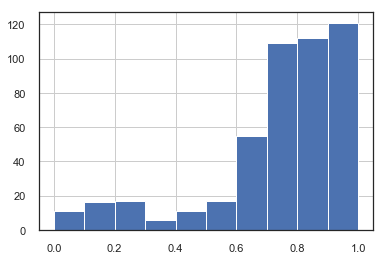

In [35]:
dataset.grad_rate.hist()

In [36]:
dataset.grad_rate.describe()

count    475.000000
mean       0.741041
std        0.229672
min        0.000000
25%        0.677836
50%        0.795082
75%        0.901220
max        1.000000
Name: grad_rate, dtype: float64

In [15]:
columns_tobe_changed = list(dataset.columns)[4:]
columns_tobe_changed

['ELL',
 'Former ELL',
 'Not ELL',
 'Not SWD',
 'SWD',
 'Asian',
 'Black',
 'Hispanic',
 'Multi-Racial',
 'Native American',
 'White',
 'Female',
 'Male',
 'Econ Disadv',
 'Not Econ Disadv']

In [16]:
new_cols = ['prob_'+x for x in columns_tobe_changed]
new_cols

['prob_ELL',
 'prob_Former ELL',
 'prob_Not ELL',
 'prob_Not SWD',
 'prob_SWD',
 'prob_Asian',
 'prob_Black',
 'prob_Hispanic',
 'prob_Multi-Racial',
 'prob_Native American',
 'prob_White',
 'prob_Female',
 'prob_Male',
 'prob_Econ Disadv',
 'prob_Not Econ Disadv']

In [17]:
dataset[new_cols] = round(dataset[columns_tobe_changed].div(dataset.total_stud, axis=0),2)
dataset.head()

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv,prob_ELL,prob_Former ELL,prob_Not ELL,prob_Not SWD,prob_SWD,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,6.0,19.0,NaN,NaN,1.0,6.0,23.0,27.0,2.0,0.03,0.10,0.86,0.72,0.28,0.10,0.21,0.66,NaN,NaN,0.03,0.21,0.79,0.93,0.07
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,19.0,42.0,1.0,1.0,2.0,38.0,50.0,77.0,11.0,0.01,0.10,0.89,0.85,0.15,0.26,0.22,0.48,0.01,0.01,0.02,0.43,0.57,0.88,0.12
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,19.0,52.0,4.0,NaN,10.0,40.0,52.0,62.0,30.0,NaN,0.01,0.99,0.83,0.17,0.08,0.21,0.57,0.04,NaN,0.11,0.43,0.57,0.67,0.33
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,25.0,41.0,1.0,NaN,5.0,47.0,26.0,65.0,8.0,0.08,0.05,0.86,0.77,0.23,0.01,0.34,0.56,0.01,NaN,0.07,0.64,0.36,0.89,0.11
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,12.0,27.0,NaN,NaN,1.0,20.0,22.0,41.0,1.0,0.05,0.02,0.93,0.60,0.40,0.05,0.29,0.64,NaN,NaN,0.02,0.48,0.52,0.98,0.02


In [24]:
dataset.describe()

,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv,prob_ELL,prob_Former ELL,prob_Not ELL,prob_Not SWD,prob_SWD,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
count,475.000000,475.000000,388.000000,419.000000,475.000000,475.000000,468.000000,401.000000,467.000000,474.000000,242.000000,230.000000,405.000000,472.000000,467.000000,475.000000,474.000000,388.000000,419.000000,475.000000,475.000000,468.000000,401.000000,467.000000,474.000000,242.000000,230.000000,405.000000,472.000000,467.000000,475.000000,474.000000
mean,151.766316,0.741041,16.092784,11.579952,128.406316,128.212632,23.905983,32.344140,41.389722,59.421941,4.049587,2.782609,24.701235,74.817797,78.747323,113.402105,38.445148,0.119897,0.074916,0.836253,0.819853,0.182842,0.119352,0.350642,0.448165,0.025083,0.018565,0.100148,0.498602,0.513169,0.785916,0.214536
std,180.225826,0.229672,26.756663,18.817435,159.859673,161.575782,24.018545,86.267846,38.709800,58.126413,5.621316,4.330823,67.081760,88.962054,97.298446,126.364604,66.273651,0.158682,0.085757,0.208849,0.091447,0.089411,0.146856,0.245137,0.245225,0.022282,0.022932,0.134578,0.140571,0.130824,0.137550,0.137342
min,5.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.010000,0.400000,0.000000,0.010000,0.000000,0.030000,0.000000,0.000000,0.000000,0.060000,0.070000,0.210000,0.010000
25%,79.000000,0.677836,3.000000,3.000000,64.000000,65.000000,12.000000,2.000000,18.000000,23.000000,1.000000,1.000000,2.000000,35.000000,38.000000,62.000000,10.000000,0.030000,0.030000,0.810000,0.760000,0.130000,0.020000,0.170000,0.230000,0.010000,0.010000,0.020000,0.430000,0.440000,0.740000,0.120000
50%,100.000000,0.795082,6.000000,5.000000,86.000000,81.000000,19.000000,6.000000,30.000000,48.000000,2.000000,2.000000,4.000000,49.000000,50.000000,80.000000,18.000000,0.060000,0.050000,0.900000,0.820000,0.180000,0.060000,0.280000,0.460000,0.020000,0.010000,0.040000,0.490000,0.510000,0.810000,0.190000
75%,126.500000,0.901220,16.000000,11.000000,114.000000,108.000000,26.000000,23.000000,51.000000,71.750000,4.000000,3.000000,18.000000,68.500000,69.000000,100.000000,34.750000,0.130000,0.090000,0.960000,0.880000,0.240000,0.150000,0.470000,0.640000,0.030000,0.020000,0.120000,0.570000,0.580000,0.880000,0.260000
max,1322.000000,1.000000,184.000000,144.000000,1308.000000,1298.000000,170.000000,830.000000,276.000000,390.000000,39.000000,37.000000,808.000000,577.000000,800.000000,861.000000,645.000000,0.850000,0.600000,1.000000,1.000000,0.600000,0.880000,0.960000,1.000000,0.200000,0.280000,0.790000,1.000000,1.000000,1.000000,0.790000


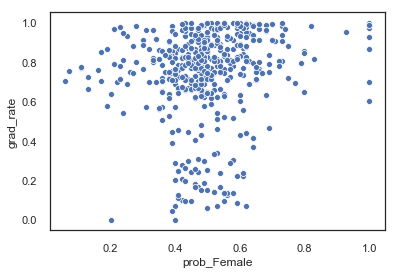

In [25]:
sns.scatterplot(dataset['prob_Female'], dataset.grad_rate)

In [26]:
merged_set.shape

NameError: name 'merged_set' is not defined

In [18]:
merged_set.isna().sum()

NameError: name 'merged_set' is not defined

In [19]:
new_cols

['prob_ELL',
 'prob_Former ELL',
 'prob_Not ELL',
 'prob_Not SWD',
 'prob_SWD',
 'prob_Asian',
 'prob_Black',
 'prob_Hispanic',
 'prob_Multi-Racial',
 'prob_Native American',
 'prob_White',
 'prob_Female',
 'prob_Male',
 'prob_Econ Disadv',
 'prob_Not Econ Disadv']

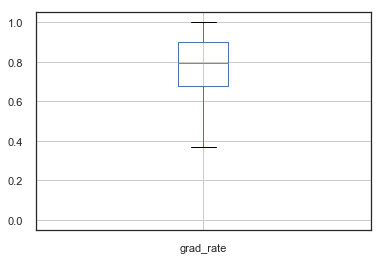

In [45]:
#Checking for outliers
dataset.boxplot(['grad_rate'])

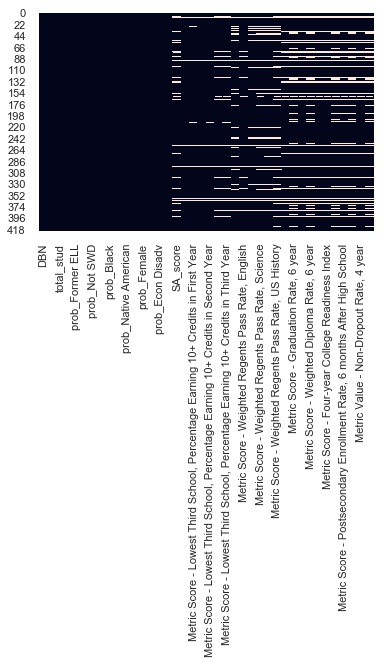

In [228]:
#Checking missing data
sns.heatmap(merged_set.isnull(), cbar=False)

In [20]:
#Replace missing value with 0
merged_set = merged_set.fillna(0)

NameError: name 'merged_set' is not defined

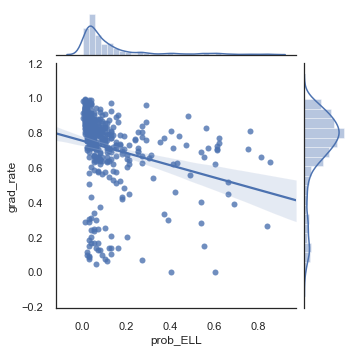

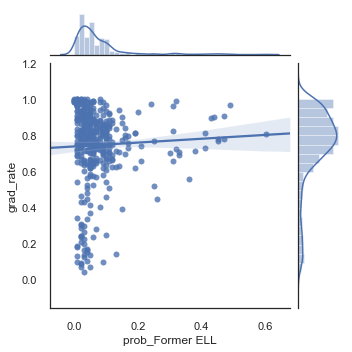

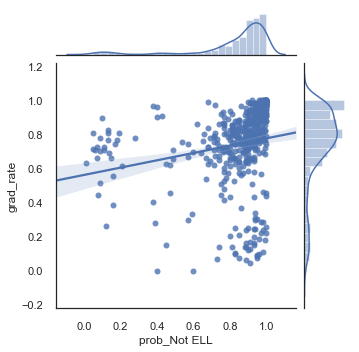

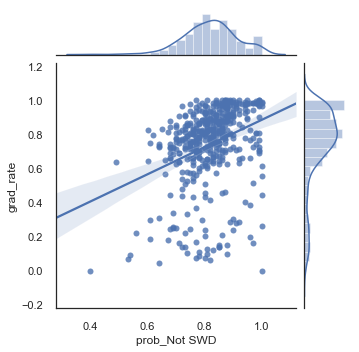

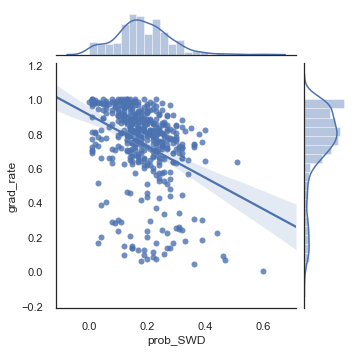

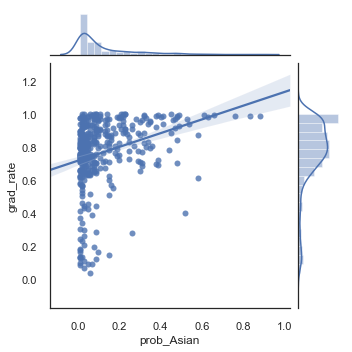

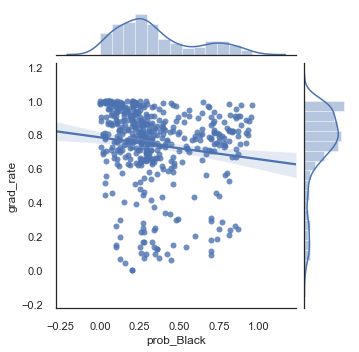

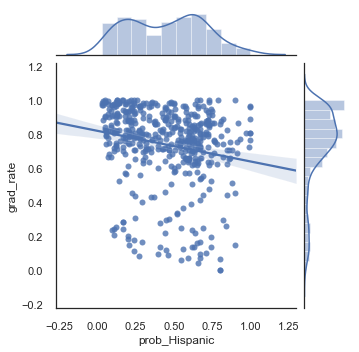

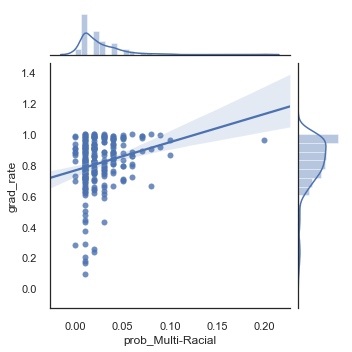

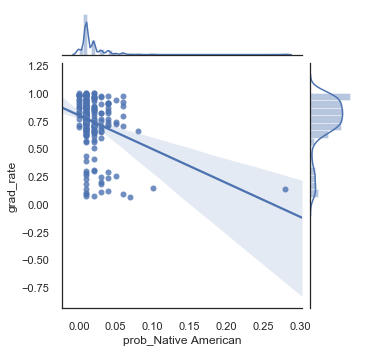

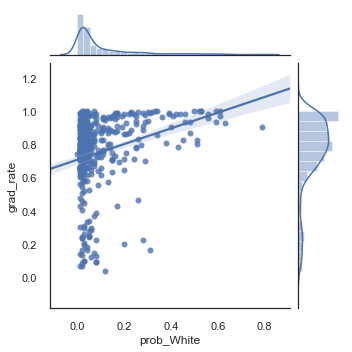

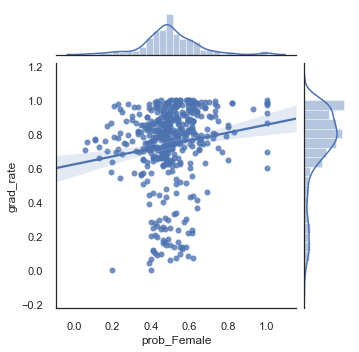

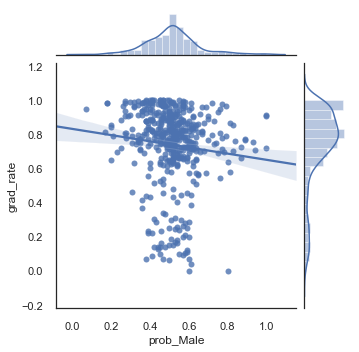

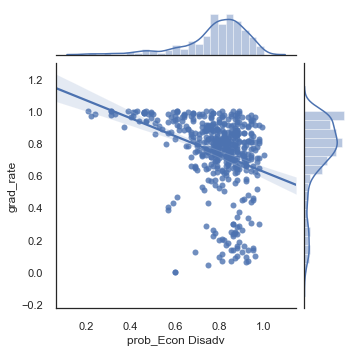

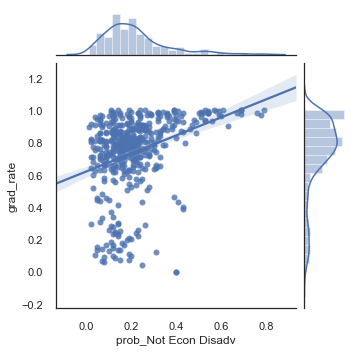

In [21]:
for col in new_cols:
    sns.jointplot(x=col, y='grad_rate', data=dataset, kind="reg",height=5)

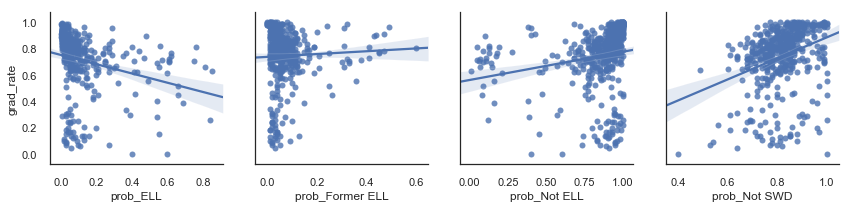

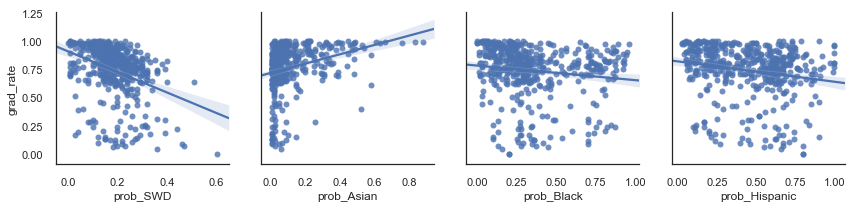

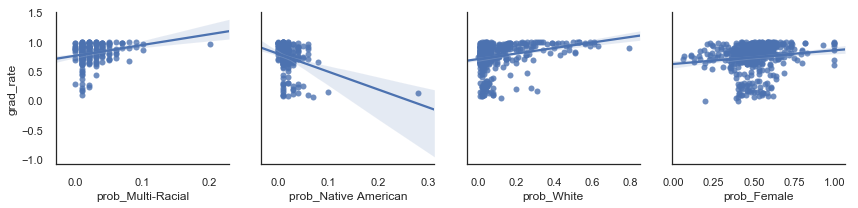

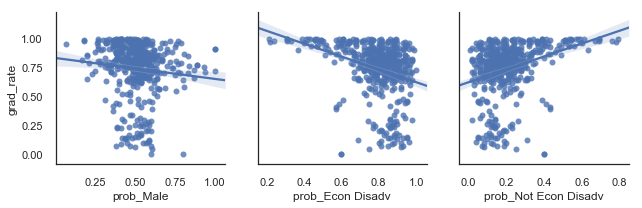

In [50]:
n = 4
row_groups= [new_cols[i:i+n] for i in range(0, len(new_cols), n) ]
for i in row_groups:
    pp = sns.pairplot(data=dataset, y_vars=['grad_rate'],x_vars=i, kind="reg", height=3)

In [67]:
dataset.to_csv("dataset.csv")

In [22]:
# two rows have grad rate of 0%.  Remove them
dataset[dataset['grad_rate'] == 0]

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv,prob_ELL,prob_Former ELL,prob_Not ELL,prob_Not SWD,prob_SWD,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
130,07X520,FOREIGN LANGUAGE ACADEMY OF GLOBAL STUDIES,5,0.0,3.0,NaN,2.0,5.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN,1.0,4.0,3.0,2.0,0.6,NaN,0.4,1.0,NaN,NaN,0.2,0.8,NaN,NaN,NaN,0.2,0.8,0.6,0.4
167,09X276,LEADERSHIP INSTITUTE,5,0.0,2.0,NaN,3.0,2.0,3.0,NaN,1.0,4.0,NaN,NaN,NaN,2.0,3.0,3.0,2.0,0.4,NaN,0.6,0.4,0.6,NaN,0.2,0.8,NaN,NaN,NaN,0.4,0.6,0.6,0.4


In [115]:
d = dataset[dataset['grad_rate'] > 0]
len(dataset)-len(d)

2

In [443]:
d.dtypes

DBN                      object
School Name              object
total_stud                int64
grad_rate               float64
ELL                     float64
Former ELL              float64
Not ELL                 float64
Not SWD                 float64
SWD                     float64
Asian                   float64
Black                   float64
Hispanic                float64
Multi-Racial            float64
Native American         float64
White                   float64
Female                  float64
Male                    float64
Econ Disadv             float64
Not Econ Disadv         float64
prob_ELL                float64
prob_Former ELL         float64
prob_Not ELL            float64
prob_Not SWD            float64
prob_SWD                float64
prob_Asian              float64
prob_Black              float64
prob_Hispanic           float64
prob_Multi-Racial       float64
prob_Native American    float64
prob_White              float64
prob_Female             float64
prob_Mal

In [23]:
plt.matshow(d.corr())
plt.xticks(range(len(d.columns)), d.columns)
plt.yticks(range(len(d.columns)), d.columns)
plt.colorbar()
plt.show()

NameError: name 'd' is not defined

In [68]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

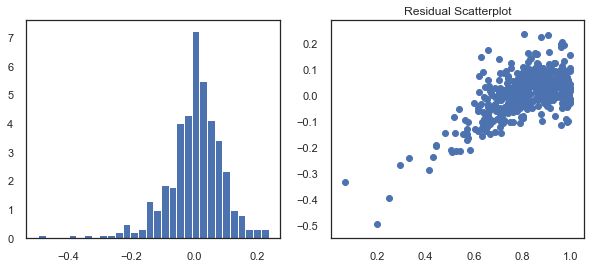

In [270]:
checkresiduals(merged_set, 'grad_rate', features_model)

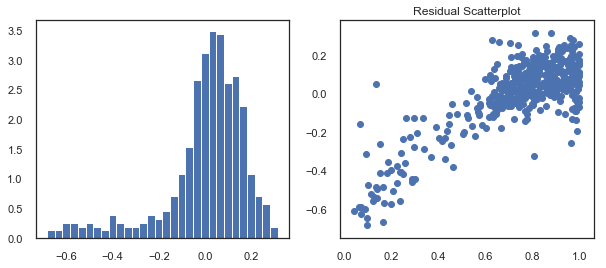

In [131]:
# same as above, except removed tghe two
checkresiduals(d, 'grad_rate', features_model)

In [118]:
d.grad_rate.describe()

count    473.000000
mean       0.744174
std        0.225025
min        0.041667
25%        0.684783
50%        0.795620
75%        0.902439
max        1.000000
Name: grad_rate, dtype: float64

In [269]:
features_model = sm.OLS(endog=merged_set['grad_rate'], exog=sm.add_constant(merged_set[filtered_cols]) ).fit()

features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     21.48
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           2.02e-62
Time:                        15:32:05   Log-Likelihood:                 425.32
No. Observations:                 420   AIC:                            -792.6
Df Residuals:                     391   BIC:                            -675.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
const                                                                        -2.5466      6.250     -0.407      0.684     -14.835       9.742
SA_score                                                                      0.0488      0.016      2.993      0.003       0.017       0.081
total_stud                                                                -1.728e-05      3e-05     -0.577      0.564   -7.62e-05    4.16e-05
prob_Former ELL                                                               0.6324      0.100      6.330      0.000       0.436       0.829
prob_Not ELL                                                                  0.5068      0.048     10.652      0.000       0.413       0.600
prob_Not SWD                                                                  0.5672      0.076      7.507      0.000       0.419       0.716
prob_Asian                                                                   -0.2387      0.239     -1.000      0.318      -0.708       0.230
prob_Black                                                                   -0.3041      0.230     -1.322      0.187      -0.756       0.148
prob_Hispanic                                                                -0.2507      0.232     -1.081      0.280      -0.707       0.205
prob_Native American                                                         -1.6485      0.426     -3.870      0.000      -2.486      -0.811
prob_White                                                                   -0.1966      0.231     -0.852      0.395      -0.650       0.257
prob_Female                                                                   3.9093      9.380      0.417      0.677     -14.532      22.350
prob_Male                                                                     3.8752      9.380      0.413      0.680     -14.566      22.317
prob_Econ Disadv                                                             -1.2672      3.125     -0.405      0.685      -7.412       4.877
prob_Not Econ Disadv                                                         -1.2794      3.125     -0.409      0.682      -7.424       4.865
Metric Score - Average Completion Rate for Remaining Regents                  0.0293      0.008      3.828      0.000       0.014       0.044
Metric Score - Weighted Regents Pass Rate, English                           -0.0043      0.005     -0.812      0.417      -0.015       0.006
Metric Score - Weighted Regents Pass Rate, Math                               0.0093      0.006      1.594      0.112      -0.002       0.021
Metric Score - Weighted Regents Pass Rate, Science                           -0.0167      0.007     -

In [268]:
merged_set[filtered_cols].dtypes

SA_score                                                                     float64
total_stud                                                                     int64
prob_Former ELL                                                              float64
prob_Not ELL                                                                 float64
prob_Not SWD                                                                 float64
prob_Asian                                                                   float64
prob_Black                                                                   float64
prob_Hispanic                                                                float64
prob_Native American                                                         float64
prob_White                                                                   float64
prob_Female                                                                  float64
prob_Male                                                        

In [122]:
d['grad_log'] = np.log(d['grad_rate'])

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


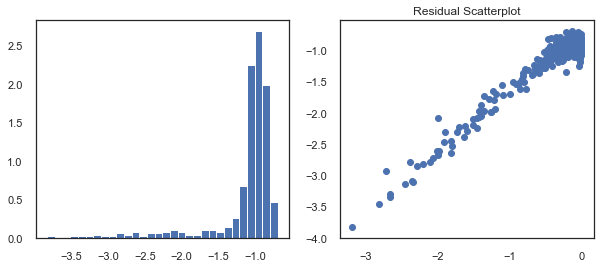

In [126]:
checkresiduals(d, 'grad_log', features_model)

In [128]:
d['grad_recipr'] = 1/d['grad_rate']

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
d['grad_recipr'].describe()

count    473.000000
mean       1.838574
std        2.163561
min        1.000000
25%        1.108108
50%        1.256881
75%        1.460317
max       24.000000
Name: grad_recipr, dtype: float64

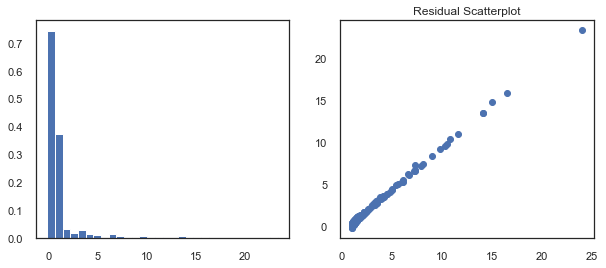

In [130]:
checkresiduals(d, 'grad_recipr', features_model)

In [90]:
# for col in filtered_cols:
#     sns.jointplot(x=col, y='grad_log', data=dataset, kind="reg",height=5)

In [210]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

In [97]:
print(dataset.shape, poly_scaled_features.shape)

(475, 36) (475, 55)


In [139]:
poly_scaled_features_model = sm.OLS(endog=dataset['grad_rate'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     5.337
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.52e-31
Time:                        13:37:24   Log-Likelihood:                 219.77
No. Observations:                 475   AIC:                            -255.5
Df Residuals:                     383   BIC:                             127.5
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.7410      0.008     95.196      0.000       0.726       0.756
1                                          3.892e-11   8.65e-11      0.450      0.653   -1.31e-10    2.09e-10
prob_ELL                                     15.8447     15.085      1.050      0.294     -13.816      45.505
prob_Former ELL                               8.8631      8.622      1.028      0.305      -8.089      25.815
prob_Not ELL                                 30.7522     30.260      1.016      0.310     -28.744      90.249
prob_Not SWD                                  0.3737      0.528      0.707      0.480      -0.665       1.413
prob_SWD                                     -0.3737      0.528     -0.707      0.480      -1.413       0.665
prob_Asian                                   13.9346     10.218      1.364      0.173      -6.156      34.025
prob_Black                                   24.3251     18.375      1.324      0.186     -11.803      60.453
prob_Hispanic                                26.6834     19.902      1.341      0.181     -12.447      65.814
prob_Multi-Racial                             1.4910      1.422      1.049      0.295      -1.305       4.287
prob_Native American                          1.9760      1.607      1.229      0.220      -1.184       5.136
prob_White                                   10.0866      8.705      1.159      0.247      -7.029      27.202
prob_Female                                  -6.8381      4.491     -1.523      0.129     -15.668       1.992
prob_Male                                    -5.2958      3.930     -1.348      0.179     -13.023       2.431
prob_Econ Disadv                             -0.2426      0.532     -0.456      0.648      -1.288       0.803
prob_Not Econ Disadv                          0.2426      0.532      0.456      0.648      -0.803       1.288
prob_ELL^2                                    3.2876     23.569      0.139      0.889     -43.054      49.629
prob_ELL prob_Former ELL                      1.6539     17.707      0.093      0.926     -33.161      36.468
prob_ELL prob_Not ELL                         3.6856     25.039      0.147      0.883     -45.546      52.917
prob_ELL prob_Not SWD                        16.4400     15.763      1.043      0.298     -14.554      47.434
prob_ELL prob_SWD                             3.1979      2.462      1.299      0.195      -1.643       8.039
prob_ELL prob_Asian                         -19.2246      9.864     -1.949      0.052     -38.620       0.171
prob_ELL prob_Black                         -16.9129      8.693     -1.946      0.052     -34.004       0.179
prob_ELL prob_Hispanic                      -70.1699     36.562     -1.919      0.056    -142.057       1.717
pro

In [177]:
achievement = pd.read_csv('Student_Achievement.csv', skiprows = 1)

In [182]:
len(achievement.columns)

110

In [183]:
print(len(d), len(achievement))

473 491


In [185]:
# merge d (which is just the original dataset minus the 2 zero grad_rates)
# with student achievement tab in HS Quality Reports file
newset = d.merge(achievement,on = 'DBN',how = 'inner')x

In [186]:
len(newset)

420

In [189]:
len(newset.columns)

147

In [167]:
achievement = achievement.rename(columns={'Metric Value - Graduation Rate, 4 year':'gradrate'})

In [195]:
newset = newset.rename(columns={'Student Achievement - Section Score':'SA_score'})

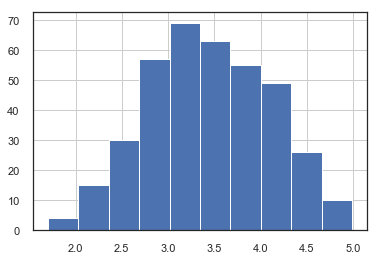

In [197]:
# attempted running model using Student Achievement as target variable instead of grad_rate- too many interactions
newset.SA_score.hist()

In [203]:
newset = newset.drop(['Former ELL', 'Not SWD', 'Asian', 'Hispanic', 'Native American', 'Female'], axis=1)

In [216]:
newset = newset.drop(['prob_ELL', 'prob_SWD', 'prob_Multi-Racial', 'grad_log'], axis=1)

In [222]:
merged_set = newset[['DBN',
'School Name_x',
'total_stud',
'grad_rate',
'prob_Former ELL',
'prob_Not ELL',
'prob_Not SWD',
'prob_Asian',
'prob_Black',
'prob_Hispanic',
'prob_Native American',
'prob_White',
'prob_Female',
'prob_Male',
'prob_Econ Disadv',
'prob_Not Econ Disadv',
'SA_score',
'Metric Score - Percentage Earning 10+ Credits in First Year',
'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in First Year',
'Metric Score - Percentage Earning 10+ Credits in Second Year',
'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Second Year',
'Metric Score - Percentage Earning 10+ Credits in Third Year',
'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Third Year',
'Metric Score - Average Completion Rate for Remaining Regents',
'Metric Score - Weighted Regents Pass Rate, English',
'Metric Score - Weighted Regents Pass Rate, Math',
'Metric Score - Weighted Regents Pass Rate, Science'
,'Metric Score - Weighted Regents Pass Rate, Global History'
,'Metric Score - Weighted Regents Pass Rate, US History'
,'Metric Score - Graduation Rate, 4 year'
,'Metric Score - Graduation Rate, 6 year'
,'Metric Score - Weighted Diploma Rate, 4 year'
,'Metric Score - Weighted Diploma Rate, 6 year'
,'Metric Score - College and Career Preparatory Course Index'
,'Metric Score - Four-year College Readiness Index'
,'Metric Score - College Readiness Rate including persistence'
,'Metric Score - Postsecondary Enrollment Rate, 6 months After High School'
,'Metric Score - Postsecondary Enrollment Rate, 18 months After High School'
,'Metric Value - Non-Dropout Rate, 4 year'
,'Metric Value - Non-Dropout Rate, 6 year'
]]

In [444]:
print(d.shape, newset.shape, merged_set.shape)

(473, 38) (420, 126) (420, 40)


In [233]:
merged_set.columns

Index(['DBN', 'School Name_x', 'total_stud', 'grad_rate', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic', 'prob_Native American', 'prob_White', 'prob_Female',
       'prob_Male', 'prob_Econ Disadv', 'prob_Not Econ Disadv', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in First Year',
       'Metric Score - Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Average Completion Rate for Remaining Regents',
       'Metric Score - Weighted Regents Pass Rate, English',
       'Metric Score - Weighted Regents Pass Rate, Math',
       'Metric Score - Weigh

In [294]:
filtered_cols = [
'prob_Former ELL',
'prob_Not ELL',
'prob_Not SWD',
'prob_Asian',
'prob_Black',
'prob_Hispanic',
'prob_White',
'Metric Score - Weighted Regents Pass Rate, Science'
,'Metric Score - Weighted Regents Pass Rate, US History'
,'Metric Score - Four-year College Readiness Index'
]

In [295]:
features_model = sm.OLS(endog=merged_set['grad_rate'], exog=sm.add_constant(merged_set[filtered_cols]) ).fit()

features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     42.27
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           4.81e-57
Time:                        15:55:39   Log-Likelihood:                 378.78
No. Observations:                 420   AIC:                            -735.6
Df Residuals:                     409   BIC:                            -691.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.4929      0.232     -2.122      0.034      -0.949      -0.036
prob_Former ELL                                           0.7459      0.106      7.015      0.000       0.537       0.955
prob_Not ELL                                              0.6080      0.049     12.523      0.000       0.513       0.703
prob_Not SWD                                              0.7286      0.073      9.914      0.000       0.584       0.873
prob_Asian                                                0.0891      0.220      0.405      0.686      -0.344       0.522
prob_Black                                                0.0518      0.211      0.245      0.806      -0.363       0.467
prob_Hispanic                                             0.1228      0.210      0.584      0.560      -0.291       0.536
prob_White                                                0.2141      0.212      1.011      0.313      -0.202       0.630
Metric Score - Weighted Regents Pass Rate, Science        0.0033      0.006      0.570      0.569      -0.008       0.015
Metric Score - Weighted Regents Pass Rate, US History     0.0004      0.005      0.074      0.941      -0.010       0.010
Metric Score - Four-year College Readiness Index          0.0076      0.004      2.032      0.043       0.000       0.015
==============================================================================
Omnibus:                       78.425   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.702
Skew:                          -0.929   Prob(JB):                     1.43e-42
Kurtosis:                       5.750   Cond. No.                         561.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

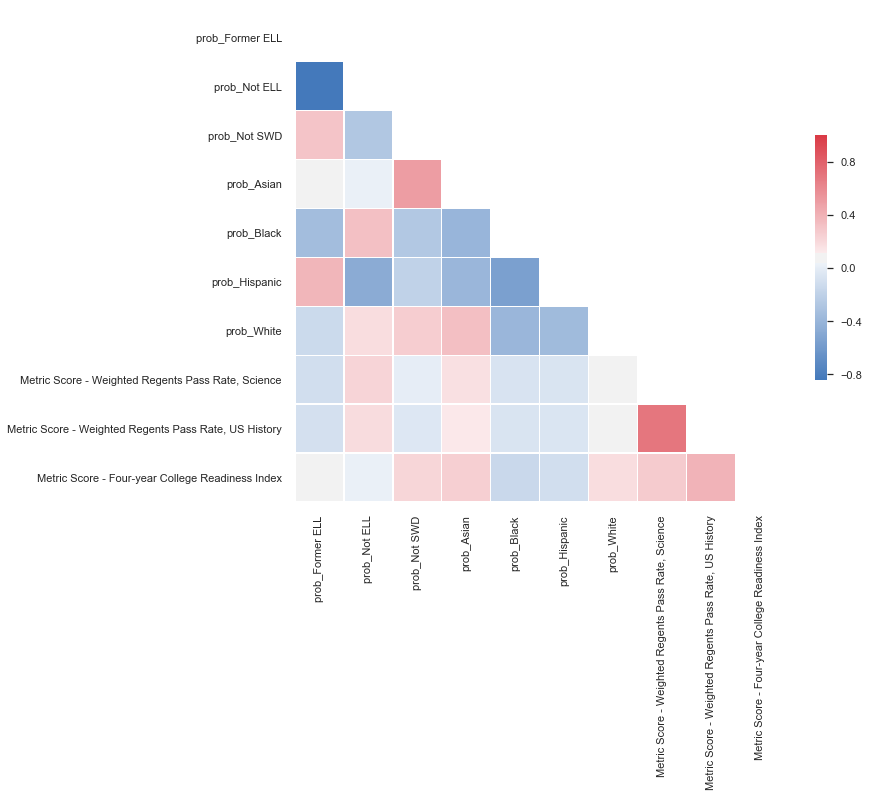

In [296]:
CorrMtx(merged_set[filtered_cols].corr(), dropDuplicates = True)

In [ ]:
scaler = StandardScaler()
scaler.fit(merged_set[filtered_cols])
scaled_features = scaler.transform(merged_set[filtered_cols])

scaled_features_dataset = pd.DataFrame(scaled_features, columns=filtered_cols, index=dataset.index)
scaled_features_dataset.head()

In [297]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(merged_set[filtered_cols])
poly_columns = poly.get_feature_names(merged_set[filtered_cols].columns)
poly_features = pd.DataFrame(poly_data, columns=poly_columns, index=merged_set.index)
scaler.fit(poly_features)
scaled_features = scaler.transform(poly_features)

poly_scaled_features = pd.DataFrame(scaled_features, columns=poly_columns, index=merged_set.index)
poly_scaled_features.shape

(420, 66)

In [298]:
# poly_scaled_features_model = sm.OLS(endog=df['price_log'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model = sm.OLS(endog=merged_set['grad_rate'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     11.31
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           3.96e-55
Time:                        15:56:09   Log-Likelihood:                 465.76
No. Observations:                 420   AIC:                            -799.5
Df Residuals:                     354   BIC:                            -532.9
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================================
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                        0.8049      0.004    189.705      0.000       0.797       0.813
1                                                                                                          1.44e-14   3.68e-14      0.391      0.696    -5.8e-14    8.68e-14
prob_Former ELL                                                                                              1.3971      0.600      2.327      0.021       0.217       2.578
prob_Not ELL                                                                                                 0.1019      0.671      0.152      0.879      -1.217       1.421
prob_Not SWD                                                                                                 0.0057      0.321      0.018      0.986      -0.625       0.636
prob_Asian                                                                                                   0.3202      1.694      0.189      0.850      -3.012       3.652
prob_Black                                                                                                   0.5116      2.675      0.191      0.848      -4.750       5.773
prob_Hispanic                                                                                                0.3165      2.744      0.115      0.908      -5.079       5.712
prob_White                                                                                                   0.5620      1.424      0.395      0.693      -2.238       3.362
Metric Score - Weighted Regents Pass Rate, Science                                                           0.2304      0.369      0.625      0.533      -0.495       0.956
Metric Score - Weighted Regents Pass Rate, US History                                                       -0.3223      0.427     -0.754      0.451      -1.163       0.518
Metric Score - Four-year College Readiness Index                                                             0.2579      0.301      0.858      0.391      -0.333       0.849
prob_Former ELL^2                                                                                           -0.0358      0.041     -0.867      0.387      -0.117       0.045
prob_Former ELL prob_Not ELL                                                                                -0.0307      0.036     -0.847      0.397      -0.102       0.041
prob_Former ELL prob_Not SWD                                                                                -0.3498      0.156     -2.241     

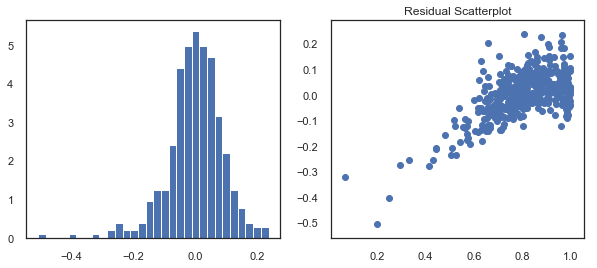

In [287]:
checkresiduals(merged_set, 'grad_rate', features_model)

In [333]:
sqr = pd.read_csv('SQR_Summary2.csv', skiprows = 1)

In [334]:
sqr = sqr[['DBN', 'Enrollment',
'Rigorous Instruction - Percent Positive',
'Collaborative Teachers - Percent Positive',
'Supportive Environment - Percent Positive',
'Effective School Leadership - Percent Positive',
'Strong Family-Community Ties - Percent Positive',
'Trust - Percent Positive',
'Average Grade 8 English Proficiency',
'Average Grade 8 Math Proficiency', 'Percent English Language Learners',
'Percent Students with Disabilities', 'Percent Self-Contained',
'Economic Need Index', 'Percent in Temp Housing - 4yr',
'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
'Percent Hispanic', 'Percent White',
'Years of principal experience at this school',
'Percent of teachers with 3 or more years of experience',
'Student Attendance Rate', 'Percent of Students Chronically Absent',
'Teacher Attendance Rate']]

In [335]:
sqr.columns

Index(['DBN', 'Enrollment', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive', 'Average Grade 8 English Proficiency',
       'Average Grade 8 Math Proficiency', 'Percent English Language Learners',
       'Percent Students with Disabilities', 'Percent Self-Contained',
       'Economic Need Index', 'Percent in Temp Housing - 4yr',
       'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent White',
       'Years of principal experience at this school',
       'Percent of teachers with 3 or more years of experience',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Teacher Attendance Rate'],
      dtype='object')

In [336]:
print(merged_set.shape, sqr.shape)

(420, 40) (491, 25)


In [337]:
bigset = merged_set.merge(sqr,on = 'DBN',how = 'inner')

In [338]:
bigset.shape

(420, 64)

In [343]:
#Replace missing value with 0
bigset = bigset.fillna(0)

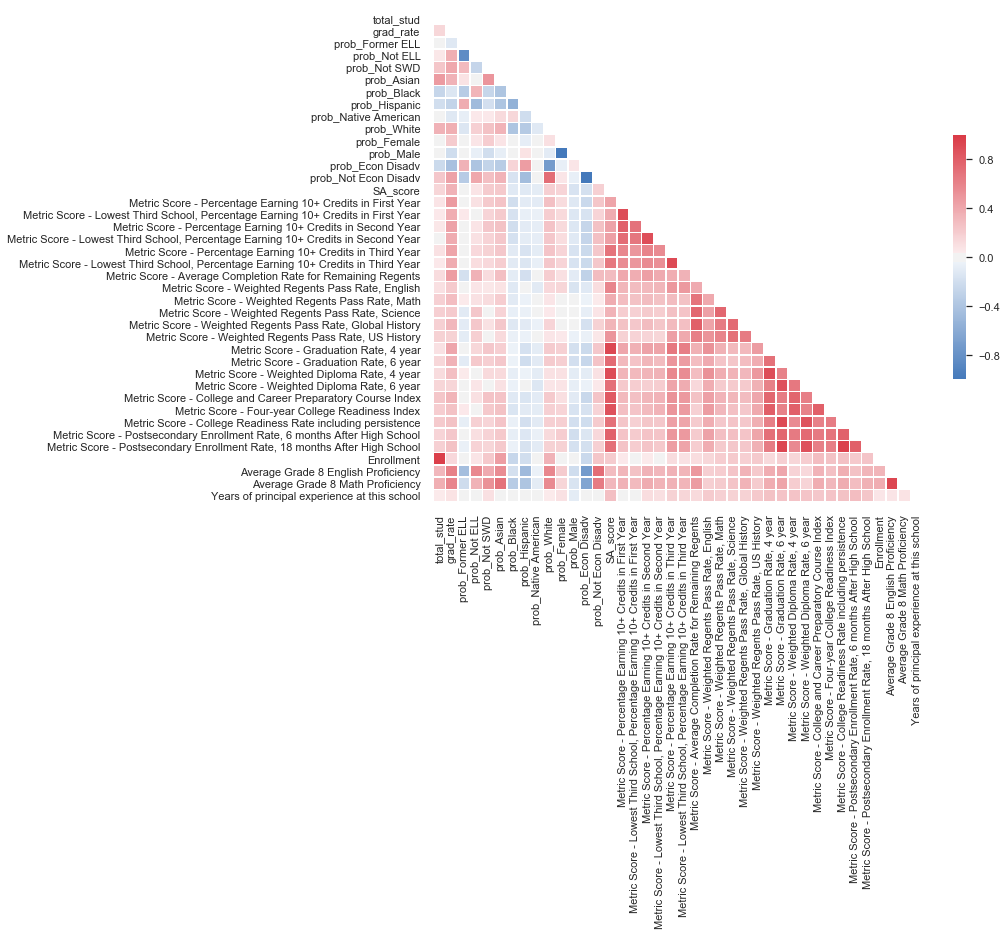

In [312]:
CorrMtx(bigset.corr(), dropDuplicates = True)

In [346]:
bigset.columns

Index(['DBN', 'School Name_x', 'total_stud', 'grad_rate', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic', 'prob_Native American', 'prob_White', 'prob_Female',
       'prob_Male', 'prob_Econ Disadv', 'prob_Not Econ Disadv', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in First Year',
       'Metric Score - Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Average Completion Rate for Remaining Regents',
       'Metric Score - Weighted Regents Pass Rate, English',
       'Metric Score - Weighted Regents Pass Rate, Math',
       'Metric Score - Weigh

In [345]:
bigset.col

DBN                                                                                   object
School Name_x                                                                         object
total_stud                                                                             int64
grad_rate                                                                            float64
prob_Former ELL                                                                      float64
prob_Not ELL                                                                         float64
prob_Not SWD                                                                         float64
prob_Asian                                                                           float64
prob_Black                                                                           float64
prob_Hispanic                                                                        float64
prob_Native American                                                  

In [350]:
bigset[filtered_cols].dtypes

DBN                                                                                   object
School Name_x                                                                         object
total_stud                                                                             int64
prob_Former ELL                                                                      float64
prob_Not ELL                                                                         float64
prob_Not SWD                                                                         float64
prob_Asian                                                                           float64
prob_Black                                                                           float64
prob_Hispanic                                                                        float64
prob_Native American                                                                 float64
prob_White                                                            

In [381]:
filtered_cols = [
'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Trust - Percent Positive', 'Average Grade 8 English Proficiency',
       'Average Grade 8 Math Proficiency', 'Percent English Language Learners',
'Percent in Temp Housing - 4yr',
       'Student Attendance Rate',
       'Teacher Attendance Rate'
]

In [382]:
features_model = sm.OLS(endog=bigset['grad_rate'], exog=sm.add_constant(bigset[filtered_cols]) ).fit()

features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     59.77
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           2.94e-89
Time:                        16:32:59   Log-Likelihood:                 465.03
No. Observations:                 420   AIC:                            -900.1
Df Residuals:                     405   BIC:                            -839.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -1.1148      0.136     -8.219      0.000      -1.381      -0.848
prob_Former ELL                                                 0.5643      0.095      5.944      0.000       0.378       0.751
prob_Not ELL                                                    0.6576      0.088      7.513      0.000       0.486       0.830
prob_Not SWD                                                    0.1798      0.074      2.437      0.015       0.035       0.325
SA_score                                                        0.0098      0.004      2.541      0.011       0.002       0.017
Metric Score - Percentage Earning 10+ Credits in First Year     0.0171      0.004      4.135      0.000       0.009       0.025
Collaborative Teachers - Percent Positive                       0.2140      0.105      2.029      0.043       0.007       0.421
Supportive Environment - Percent Positive                       0.3891      0.120      3.231      0.001       0.152       0.626
Trust - Percent Positive                                       -0.3364      0.168     -2.001      0.046      -0.667      -0.006
Average Grade 8 English Proficiency                             0.1373      0.046      2.986      0.003       0.047       0.228
Average Grade 8 Math Proficiency                               -0.1111      0.040     -2.805      0.005      -0.189      -0.033
Percent English Language Learners                               0.4292      0.095      4.541      0.000       0.243       0.615
Percent in Temp Housing - 4yr                                  -0.3354      0.118     -2.832      0.005      -0.568      -0.103
Student Attendance Rate                                         0.6515      0.127      5.125      0.000       0.402       0.901
Teacher Attendance Rate                                         0.2278      0.083      2.738      0.006       0.064       0.391
==============================================================================
Omnibus:                      147.368   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              990.182
Skew:                          -1.329   Prob(JB):                    9.65e-216
Kurtosis:                      10.037   Cond. No.                         327.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [389]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(bigset[filtered_cols])
poly_columns = poly.get_feature_names(bigset[filtered_cols].columns)
poly_features = pd.DataFrame(poly_data, columns=poly_columns, index=bigset.index)
scaler.fit(poly_features)
scaled_features = scaler.transform(poly_features)

poly_scaled_features = pd.DataFrame(scaled_features, columns=poly_columns, index=bigset.index)
print(poly_scaled_features.shape)
poly_scaled_features['1'].describe()

(420, 120)


count    420.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: 1, dtype: float64

In [390]:
poly_scaled_features = poly_scaled_features.drop(['1'], axis=1)

In [391]:
# poly_scaled_features_model = sm.OLS(endog=df['price_log'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model = sm.OLS(endog=merged_set['grad_rate'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     10.53
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           9.94e-61
Time:                        16:38:00   Log-Likelihood:                 575.06
No. Observations:                 420   AIC:                            -910.1
Df Residuals:                     300   BIC:                            -425.3
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================================
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                     0.8049      0.004    226.547      0.000       0.798       0.812
prob_Former ELL                                                                                           2.1633      1.321      1.638      0.103      -0.436       4.763
prob_Not ELL                                                                                              2.5053      2.040      1.228      0.220      -1.510       6.520
prob_Not SWD                                                                                              0.4665      0.704      0.663      0.508      -0.918       1.851
SA_score                                                                                                  0.1501      0.557      0.270      0.788      -0.946       1.246
Metric Score - Percentage Earning 10+ Credits in First Year                                              -0.4369      0.485     -0.901      0.368      -1.391       0.517
Collaborative Teachers - Percent Positive                                                                -0.1106      0.920     -0.120      0.904      -1.920       1.699
Supportive Environment - Percent Positive                                                                -0.2566      0.691     -0.371      0.711      -1.617       1.104
Trust - Percent Positive                                                                                  0.9144      1.138      0.804      0.422      -1.325       3.154
Average Grade 8 English Proficiency                                                                       0.5864      2.275      0.258      0.797      -3.891       5.063
Average Grade 8 Math Proficiency                                                                         -0.6118      1.853     -0.330      0.742      -4.258       3.035
Percent English Language Learners                                                                         0.1558      2.166      0.072      0.943      -4.106       4.417
Percent in Temp Housing - 4yr                                                                             0.9533      0.941      1.013      0.312      -0.899       2.806
Student Attendance Rate                                                                                   0.3894      0.688      0.566      0.572      -0.965       1.744
Teacher Attendance Rate                                                                                   0.7880      0.671      1.175      0.241      -0.532       2.108
prob_Former ELL^2      

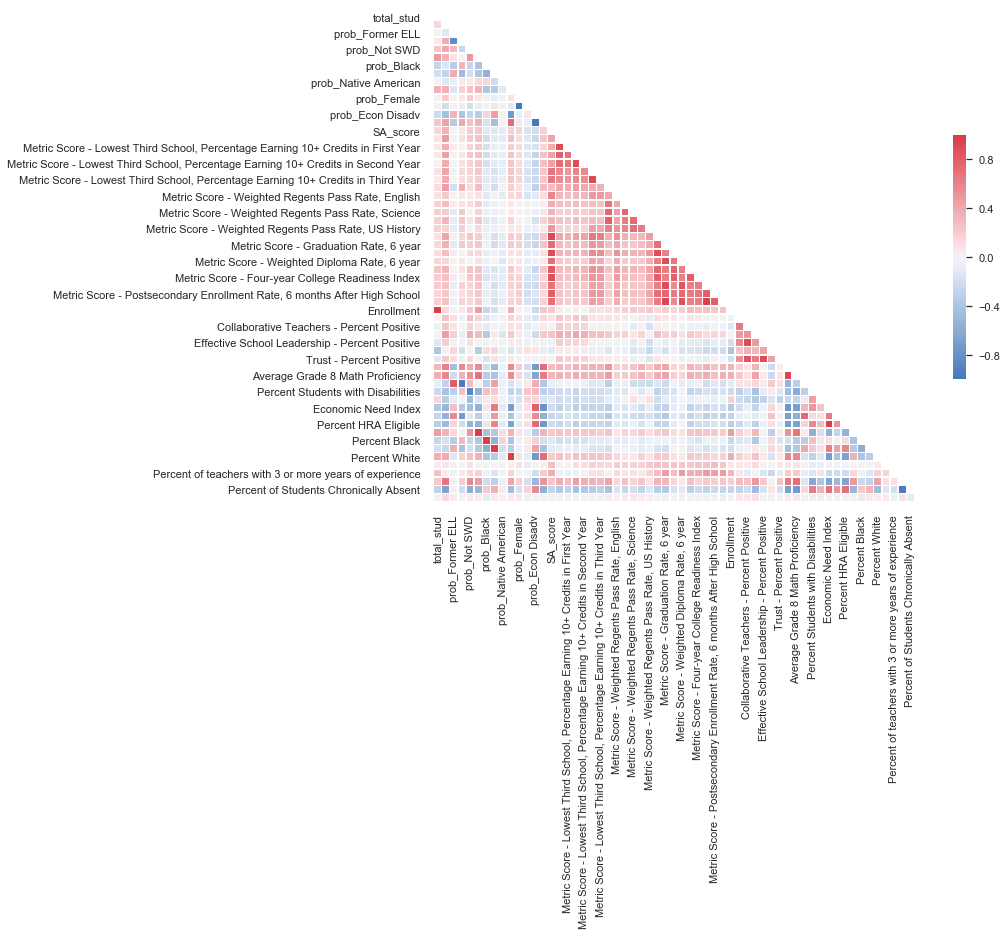

In [394]:
CorrMtx(bigset.corr(), dropDuplicates = True)

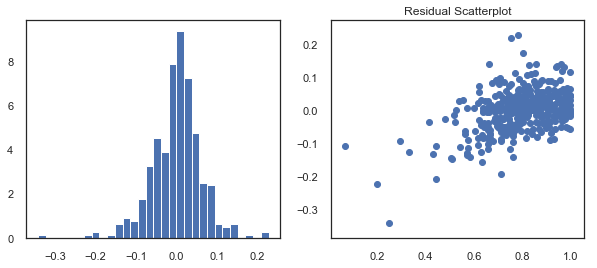

In [393]:
checkresiduals(bigset, 'grad_rate', poly_scaled_features_model)

In [398]:
biggerset = bigset[bigset['grad_rate'] >= .5]
# biggerset.dtypes

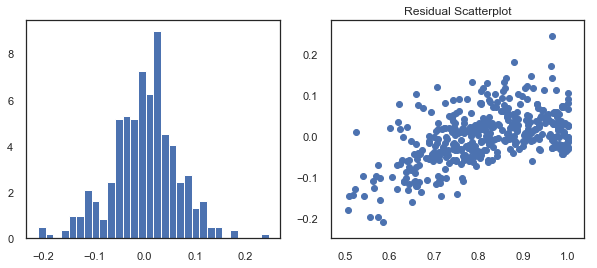

In [402]:
checkresiduals(biggerset,'grad_rate', features_model)

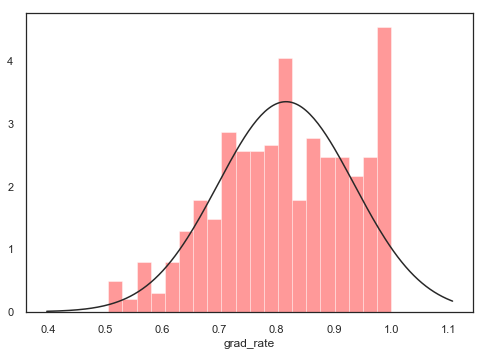

In [411]:
sns.distplot(biggerset['grad_rate'], fit=norm, bins=20, kde=False, color = 'red')

In [429]:
# 'prob_Not SWD', 'Trust - Percent Positive', 'Collaborative Teachers - Percent Positive',
filtered_cols = [
'prob_Former ELL',
       'prob_Not ELL', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Supportive Environment - Percent Positive',
       'Average Grade 8 English Proficiency',
       'Average Grade 8 Math Proficiency', 'Percent English Language Learners',
'Percent in Temp Housing - 4yr',
       'Student Attendance Rate',
       'Teacher Attendance Rate'
]

In [430]:
features_model = sm.OLS(endog=biggerset['grad_rate'], exog=sm.add_constant(biggerset[filtered_cols]) ).fit()

features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     84.42
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           8.19e-97
Time:                        17:12:46   Log-Likelihood:                 537.16
No. Observations:                 410   AIC:                            -1050.
Df Residuals:                     398   BIC:                            -1002.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -0.9097      0.109     -8.326      0.000      -1.125      -0.695
prob_Former ELL                                                 0.3491      0.079      4.408      0.000       0.193       0.505
prob_Not ELL                                                    0.5252      0.077      6.819      0.000       0.374       0.677
SA_score                                                        0.0089      0.003      2.840      0.005       0.003       0.015
Metric Score - Percentage Earning 10+ Credits in First Year     0.0178      0.003      5.215      0.000       0.011       0.024
Supportive Environment - Percent Positive                       0.2282      0.078      2.937      0.004       0.075       0.381
Average Grade 8 English Proficiency                             0.1310      0.037      3.520      0.000       0.058       0.204
Average Grade 8 Math Proficiency                               -0.0798      0.032     -2.460      0.014      -0.144      -0.016
Percent English Language Learners                               0.4353      0.081      5.401      0.000       0.277       0.594
Percent in Temp Housing - 4yr                                  -0.3670      0.096     -3.820      0.000      -0.556      -0.178
Student Attendance Rate                                         0.6565      0.100      6.566      0.000       0.460       0.853
Teacher Attendance Rate                                         0.2663      0.068      3.933      0.000       0.133       0.399
==============================================================================
Omnibus:                        7.454   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.944
Skew:                          -0.195   Prob(JB):                       0.0114
Kurtosis:                       3.610   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [422]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(biggerset[filtered_cols])
poly_columns = poly.get_feature_names(biggerset[filtered_cols].columns)
poly_features = pd.DataFrame(poly_data, columns=poly_columns, index=biggerset.index)
scaler.fit(poly_features)
scaled_features = scaler.transform(poly_features)

poly_scaled_features = pd.DataFrame(scaled_features, columns=poly_columns, index=biggerset.index)

In [424]:
poly_scaled_features = poly_scaled_features.drop(['1'], axis=1)

In [428]:
len(poly_scaled_features.columns)

77

In [425]:
poly_scaled_features_model = sm.OLS(endog=biggerset['grad_rate'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     15.53
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.17e-73
Time:                        17:10:45   Log-Likelihood:                 603.32
No. Observations:                 410   AIC:                            -1051.
Df Residuals:                     332   BIC:                            -737.4
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================================
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                     0.8163      0.003    267.751      0.000       0.810       0.822
prob_Former ELL                                                                                           1.1679      1.108      1.054      0.292      -1.011       3.347
prob_Not ELL                                                                                              1.4652      1.946      0.753      0.452      -2.363       5.293
SA_score                                                                                                 -0.2619      0.430     -0.609      0.543      -1.108       0.584
Metric Score - Percentage Earning 10+ Credits in First Year                                               0.2864      0.377      0.760      0.448      -0.454       1.027
Supportive Environment - Percent Positive                                                                -0.1716      0.414     -0.415      0.679      -0.986       0.643
Average Grade 8 English Proficiency                                                                       0.1231      1.698      0.073      0.942      -3.216       3.462
Average Grade 8 Math Proficiency                                                                         -0.0856      1.462     -0.059      0.953      -2.962       2.791
Percent English Language Learners                                                                         0.9667      1.845      0.524      0.601      -2.663       4.596
Percent in Temp Housing - 4yr                                                                            -0.0193      0.690     -0.028      0.978      -1.376       1.338
Student Attendance Rate                                                                                  -0.1676      0.498     -0.337      0.737      -1.147       0.812
Teacher Attendance Rate                                                                                   0.4247      0.532      0.798      0.425      -0.622       1.472
prob_Former ELL^2                                                                                         0.0174      0.041      0.423      0.673      -0.064       0.098
prob_Former ELL prob_Not ELL                                                                              0.1235      0.065      1.911      0.057      -0.004       0.251
prob_Former ELL SA_score                                                                                  0.0302      0.044      0.693      0.489      -0.056       0.116
prob_Former ELL Metric 

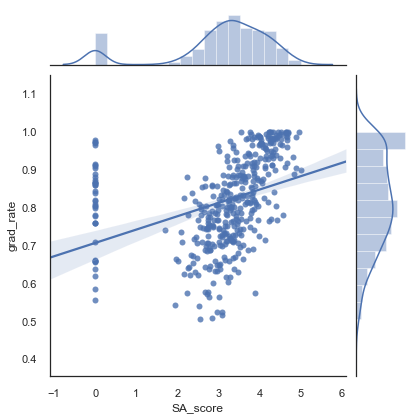

In [431]:
sns.jointplot(x='SA_score', y='grad_rate', data=biggerset, kind="reg")

In [432]:
trimmedset = biggerset[biggerset['SA_score'] > 0]

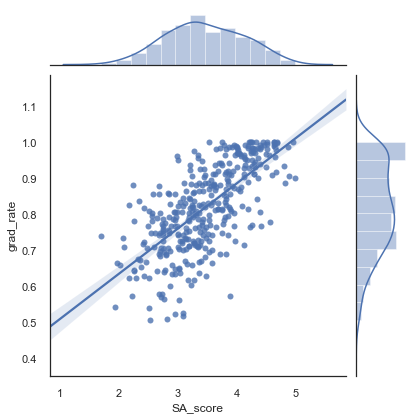

In [433]:
sns.jointplot(x='SA_score', y='grad_rate', data=trimmedset, kind="reg")

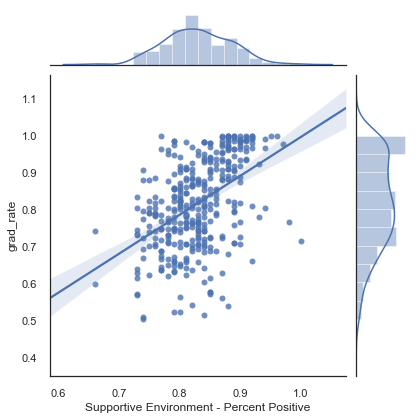

In [435]:
sns.jointplot(x='Supportive Environment - Percent Positive', y='grad_rate', data=biggerset, kind="reg")

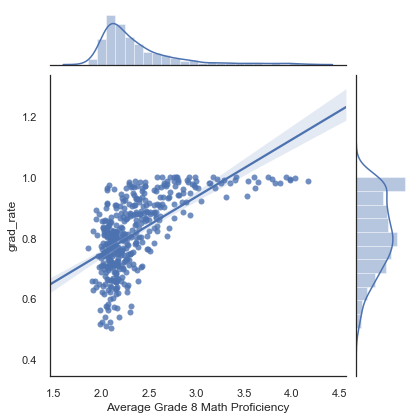

In [436]:
sns.jointplot(x='Average Grade 8 Math Proficiency', y='grad_rate', data=biggerset, kind="reg")

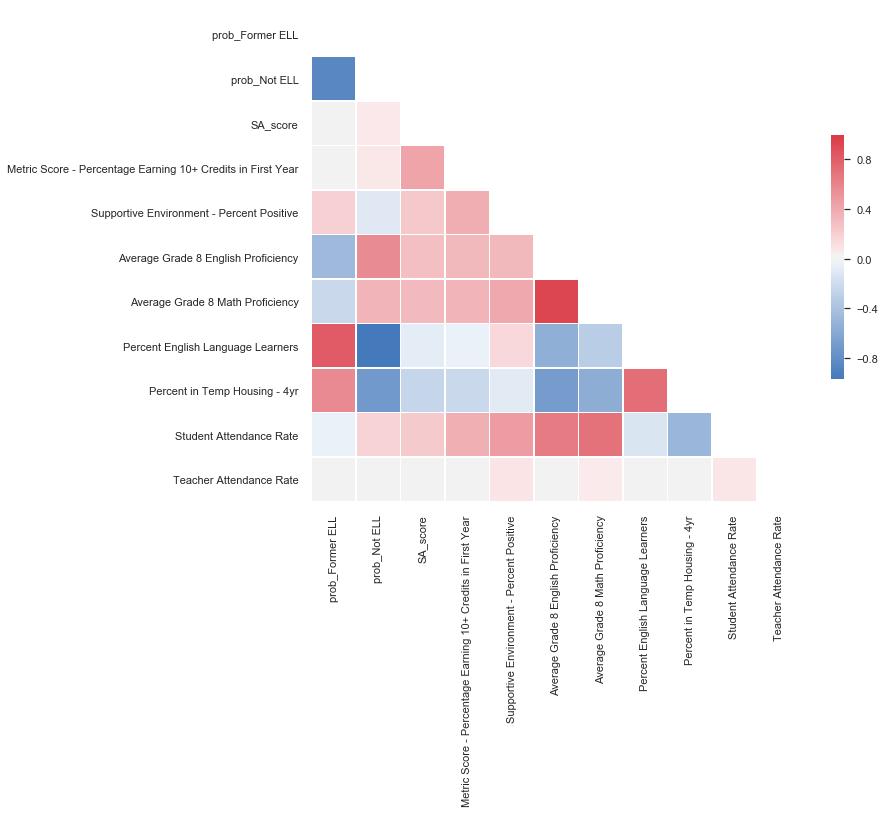

In [445]:
CorrMtx(biggerset[filtered_cols].corr(), dropDuplicates = True)

In [ ]:
scaler = StandardScaler()
scaler.fit(merged_set[filtered_cols])
scaled_features = scaler.transform(merged_set[filtered_cols])

scaled_features_dataset = pd.DataFrame(scaled_features, columns=filtered_cols, index=dataset.index)
scaled_features_dataset.head()

In [ ]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(merged_set[filtered_cols])
poly_columns = poly.get_feature_names(merged_set[filtered_cols].columns)
poly_features = pd.DataFrame(poly_data, columns=poly_columns, index=dataset.index)
scaler.fit(poly_features)
scaled_features = scaler.transform(poly_features)

poly_scaled_features = pd.DataFrame(scaled_features, columns=poly_columns, index=dataset.index)
poly_scaled_features.head(15)